## Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

## Computing Historical Volatility

In this notebook, we will be computing the 20 trading days (or 1 month) historical volatility for the time period starting from 20th April, 2016 to 13th April, 2018. Historical Volatility gauges the fluctuations of underlying securities by measuring the price changes over a predetermined period of time in the past.

## Import the libraries
First, we will import the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

## Stock data 
We will fetch the Apple data using the pandas `read_csv` function. We will then, print the data to visualize it by using the `head()` function which prints the top 5 rows of the dataset.

In [2]:
data = pd.read_csv('apple_stock_data.csv')
data.head()

,Date,Adj_Close
0,20-Apr-16,102.872663
1,21-Apr-16,101.758761
2,22-Apr-16,101.480285
3,25-Apr-16,100.904129
4,26-Apr-16,100.203140


## Computing Log Returns

Now we will compute the daily log returns by using the `shift()` function for adjusted closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the DataFrame data under the column header 'Log Returns'.

In [3]:
data['Log Returns'] = np.log(data['Adj_Close']/data['Adj_Close'].shift(1))

## Computing Historical Volatility

The one month (or 20 trading days) historical volatility will be computed by using the `DataFrame.rolling(window).std()` function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the DataFrame under the column header '20 day Historical Volatility'. 

In [4]:
data['20 day Historical Volatility'] = 100*data['Log Returns'].rolling(window=20).std()

## Plot the volatility
We will now plot the historical volatilty to visualise how it changes over the period of one year.

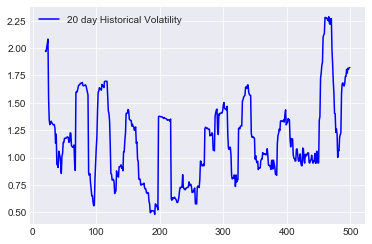

In [5]:
plt.plot(data['20 day Historical Volatility'], color = 'b', label ='20 day Historical Volatility')
plt.legend(loc='best')
plt.show()